In light of compress sensing, we want to compare the mutual incoherence for MoCA and sycronize masking.
Mutual Coherence between two bases was previsouly define as 


Consider a special type of dictionary, which is the concatenation of two orthobases, denoted as **Φ** and **Ψ**. Each of these bases is represented by an $N \times N$ unitary matrix. The dictionary can then be written as:

$
\mathbf{D} = [\mathbf{Φ}, \mathbf{Ψ}]
$

Let $ \mathbf{ϕ}_i $ and $ \mathbf{ψ}_j $ (where $ 1 \leq i, j \leq N $) represent the elements in the two bases. Following reference 13, the **mutual incoherence** between these two bases is defined as:

$
M(\mathbf{Φ}, \mathbf{Ψ}) = \sup \{ |\langle \mathbf{ϕ}_i, \mathbf{ψ}_j \rangle| \mid \forall 1 \leq i, j \leq N \}
$

**Note that M smaller mean more incoherent. We want the M to be larger for MoCA, which means information between masked and observed are alike, suggesting there are more likely to reconstruct the original series with masked series** 

Here:
- $ \langle \mathbf{ϕ}_i, \mathbf{ψ}_j \rangle $ denotes the ?(inner product between the elements $ \mathbf{ϕ}_i $ and $ \mathbf{ψ}_j $).
- $ \sup \{ \cdot \} $ represents the supremum (or maximum value) of the set.

This definition measures how "incoherent" or "independent" the two bases are with respect to each other.


**We consider the simpliest case, where Φ denote bases for unmasked view and Ψ mask view. hence two bases span the whole sample.**

We will use latent extract from MoCa to represent bases

We want to observe that MoCA have greater mutual incoherence, intuitively, corss-modality masking gives more information

### (1) use MoCA encoder for latent (bases)

In [ ]:
%cd MAE_Accelerometer/

[Errno 2] No such file or directory: 'MAE_Accelerometer/'
/home/jovyan/MAE_Accelerometer


## Step1. Sample 1000 sample for the augmented dataset. 

In [25]:
# Load the saved .pt file
import torch

data = torch.load('/home/jovyan/MAE_Accelerometer/data/200/sampled_data.pt')

flattened_samples = torch.cat([batch[0] for batch in data], dim=0)  # Concatenate samples
print(flattened_samples.shape)

torch.Size([1000, 1, 6, 200])


In [26]:
transition_sample = flattened_samples[6:7]

In [27]:
import torch
image_length = 200

test_seq_y = torch.Tensor(torch.load(f'data/{image_length}/y_test_all_mode.pt'))
                          
activity_labels = {0: "TRANSITION", 1: "WALKING", 2: "WALKING-DOWN", 3: "WALKING-UP", 4: "SITTING", 5: "STANDING", 6: "LAYING"}

# all_transition_sample_idx = np.where(test_seq_y == 0)[0]
# print(all_transition_sample_idx) # 32 sample

test_seq = torch.Tensor(torch.load(f'data/{image_length}/X_test_all.pt')).permute(0, 1, 3, 2)
print(test_seq.shape) #torch.Size([793, 1, 6, 200])

torch.Size([793, 1, 6, 200])


In [28]:
# import torch

# # Set the length of images
# image_length = 200

# # Load test labels and map them to activity labels
# test_seq_y = torch.tensor(torch.load(f'data/{image_length}/y_test_all_mode.pt'),dtype=torch.float32)  # Convert to torch.Tensor
# activity_labels = {0: "TRANSITION", 1: "WALKING", 2: "WALKING-DOWN", 3: "WALKING-UP", 4: "SITTING", 5: "STANDING", 6: "LAYING"}

# # Find all indices where the label is 'TRANSITION' (label 0)
# all_transition_sample_idx = torch.nonzero(test_seq_y == 0).squeeze()  # Tensor of indices
# print(f"Transition sample indices: {all_transition_sample_idx}")
# print(f"Number of transition samples: {all_transition_sample_idx.shape[0]}")

# # Load test sequence data
# test_seq = torch.tensor(torch.load(f'data/{image_length}/X_test_all.pt'),dtype=torch.float32)  # Shape: [793, 1, 6, 200]
# test_seq = test_seq.permute(0, 1, 3, 2)  # Adjust shape to [793, 1, 200, 6]
# print(f"Test sequence shape: {test_seq.shape}")

# # Extract all transition samples using the indices
# transition_seq = test_seq[all_transition_sample_idx]  # Shape: [number_of_transition_samples, 1, 200, 6]
# print(f"Transition samples shape: {transition_seq.shape}")

# # Construct a dataset tensor with both data and corresponding labels
# transition_labels = test_seq_y[all_transition_sample_idx]  # Labels for transition samples
# dataset = {
#     "data": transition_seq,
#     "labels": transition_labels
# }


In [ ]:
from models_mae import MaskedAutoencoderViT
moca_model = MaskedAutoencoderViT(
    img_size=[6, int(200)],
    patch_size=[1, int(20)],
    in_chans=1,
    embed_dim=768,
    depth=12,
    num_heads=12,
    decoder_embed_dim=512,
    decoder_depth=8,
    decoder_num_heads=16,
    mlp_ratio=4,
)

moca_model_checkpoint = torch.load('/home/jovyan/persistent-data/MAE_Accelerometer/experiments/661169(p200_10_alt_0.0005)/checkpoint-3999.pth',map_location='cpu')
msg = moca_model.load_state_dict(moca_model_checkpoint['model'], strict=False)
print(msg)

In [ ]:
moca_model_checkpoint['args']

Namespace(batch_size=50, epochs=4000, accum_iter=1, model='mae_vit_base_patch16', input_size=[6, 200], patch_size=[1, 20], patch_size1=1, patch_size2=20, patch_num=10, in_chans=1, mask_ratio=0.75, dump_freq=1000, norm_pix_loss=False, pre_mix_up=False, mix_up=False, normalization=False, loss_type='all', weight_decay=0.05, lr=0.0005, blr=0.01, min_lr=1e-05, warmup_epochs=40, data_path='/data/MAE_Accelerometer/data/200', alt=True, output_dir=PosixPath('/data/MAE_Accelerometer/experiments/661169(p200_10_alt_0.0005)'), log_dir=PosixPath('/data/MAE_Accelerometer/experiments/661169(p200_10_alt_0.0005)'), device='cuda', seed=1004, resume='', start_epoch=0, num_workers=4, pin_mem=True, world_size=1, local_rank=-1, dist_on_itp=False, dist_url='file:///data/MAE_Accelerometer/experiments/d1dfe3be525e4514ad7a1a86a3149747_init', ngpus=1, nodes=1, timeout=10320, job_dir=PosixPath('/data/MAE_Accelerometer/experiments/%j'), wk_dir='/data/MAE_Accelerometer', job_name='p200_10_alt_0.0005', partition='lea

## M(obsereve_base, mask_base)

### 1-sample Demo

In [ ]:

moca_model = moca_model.cpu()
transition_sample = transition_sample.cpu()
with torch.no_grad():
    moca_observed_feats, moca_masked_feats, moca_mask = moca_model.bases_view(transition_sample,mask_ratio=0.7)
    #sync_observed_feats, sync_masked_feats, sync_mask = moca_model.bases_view(transition_sample,mask_ratio=-1,time_mask_ratio=0.7)
    sync_observed_feats, sync_masked_feats, sync_mask = moca_model.bases_view(transition_sample,mask_ratio=0.7, masking_scheme='custom_sync')

print(moca_observed_feats.shape)
print(moca_masked_feats.shape)

# M_moca = torch.matmul(moca_observed_feats.squeeze()[0], moca_masked_feats.squeeze()[0].T).numpy()
# print(M_moca)

# M_sync = torch.matmul(sync_observed_feats.squeeze()[0], sync_masked_feats.squeeze()[0].T).numpy()
# print(M_sync) 
 

torch.Size([1, 19, 768])
torch.Size([1, 43, 768])



When you use `np.cov(x, y)`, it returns a matrix:

\[
\begin{bmatrix}
\text{Var}(X) & \text{Cov}(X, Y) \\
\text{Cov}(Y, X) & \text{Var}(Y)
\end{bmatrix}
\]

Where:
- `cov_matrix[0, 0]` → Variance of `x` (Var(X))
- `cov_matrix[1, 1]` → Variance of `y` (Var(Y))
- `cov_matrix[0, 1]` (or `cov_matrix[1, 0]`) → Covariance between `x` and `y` (Cov(X, Y))


In [ ]:
import numpy as np
from scipy.linalg import sqrtm

def intercovariance(views):    
    if not isinstance(views, np.ndarray):
        views = np.array(views, dtype=np.float32)

    # Compute the pairwise covariance matrix
    num_p = views.shape[0]
    covariance_matrix = np.zeros((num_p, num_p))
    
    for i in range(num_p):
        for j in range(num_p):
            covariance_matrix[i, j] = np.cov(views[i], views[j])[0, 1]
    
    return covariance_matrix


def crosscovariance(view1, view2):
    if not isinstance(view1, np.ndarray):
        view1 = np.array(view1, dtype=np.float32) # num_p1 x 768
    if not isinstance(view2, np.ndarray):
        view2 = np.array(view2, dtype=np.float32)  # num_p2 x 768

    num_p1 = view1.shape[0]
    num_p2 = view2.shape[0]
    covariance_matrix = np.zeros((num_p1, num_p2))

    for i in range(num_p1):
        for j in range(num_p2):
            covariance_matrix[i, j] = np.cov(view1[i], view2[j])[0, 1]

    return covariance_matrix
    

# compile into one function
def singular_value(mask_feats,unmask_feats):
    uu = intercovariance(unmask_feats)
    um = crosscovariance(unmask_feats,mask_feats)
    mm = intercovariance(mask_feats)

    optim = np.matmul(np.matmul(sqrtm(uu), um), sqrtm(mm))

    _, S, _ = np.linalg.svd(optim)
    singular = S[0]

    return singular


In [ ]:
# moca_observed_feats = moca_observed_feats.squeeze() # num_p x 768
# moca_masked_feats = moca_masked_feats.squeeze() # num_p x 768

# sync_observed_feats = sync_observed_feats.squeeze() # num_p x 768
# sync_masked_feats = sync_masked_feats.squeeze() # num_p x 768

# # calculate inter-covariance matrix for moca
# moca_uu = intercovariance(moca_observed_feats)
# moca_mm = intercovariance(moca_masked_feats)
# moca_um = crosscovariance(moca_observed_feats,moca_masked_feats)

# sync_uu = intercovariance(sync_observed_feats)
# sync_mm = intercovariance(sync_masked_feats)
# sync_um = crosscovariance(sync_observed_feats,sync_masked_feats)   

# print(moca_uu.shape, moca_mm.shape)
# print(moca_um.shape, sync_um.shape)

In [ ]:
# from scipy.linalg import sqrtm
# moca_uu_sqrt = sqrtm(moca_uu)   
# moca_mm_sqrt = sqrtm(moca_mm)

# sync_uu_sqrt = sqrtm(sync_uu)
# sync_mm_sqrt = sqrtm(sync_mm)

# print(moca_uu_sqrt.shape, moca_mm_sqrt.shape)

In [ ]:
# moca_optim = np.matmul(np.matmul(moca_uu_sqrt, moca_um), moca_mm_sqrt)
# sync_optim = np.matmul(np.matmul(sync_uu_sqrt, sync_um), sync_mm_sqrt)

# print(moca_optim.shape,sync_optim.shape)

In [ ]:
# _, moca_S, _ = np.linalg.svd(moca_optim)
# # Largest singular value
# moca_singular = moca_S[0]
# print(moca_singular)

# _, sync_S, _ = np.linalg.svd(sync_optim)
# sync_singular = sync_S[0]
# print(sync_singular)    

In [ ]:
sync_singular = singular_value(sync_masked_feats,sync_observed_feats)
moca_singular = singular_value(moca_masked_feats,moca_observed_feats)

print(sync_singular, moca_singular)

0.0006632139248289419 0.0006686643218265519


mask_np (6, 10)
predict_series (6, 200)
target_series (6, 200)


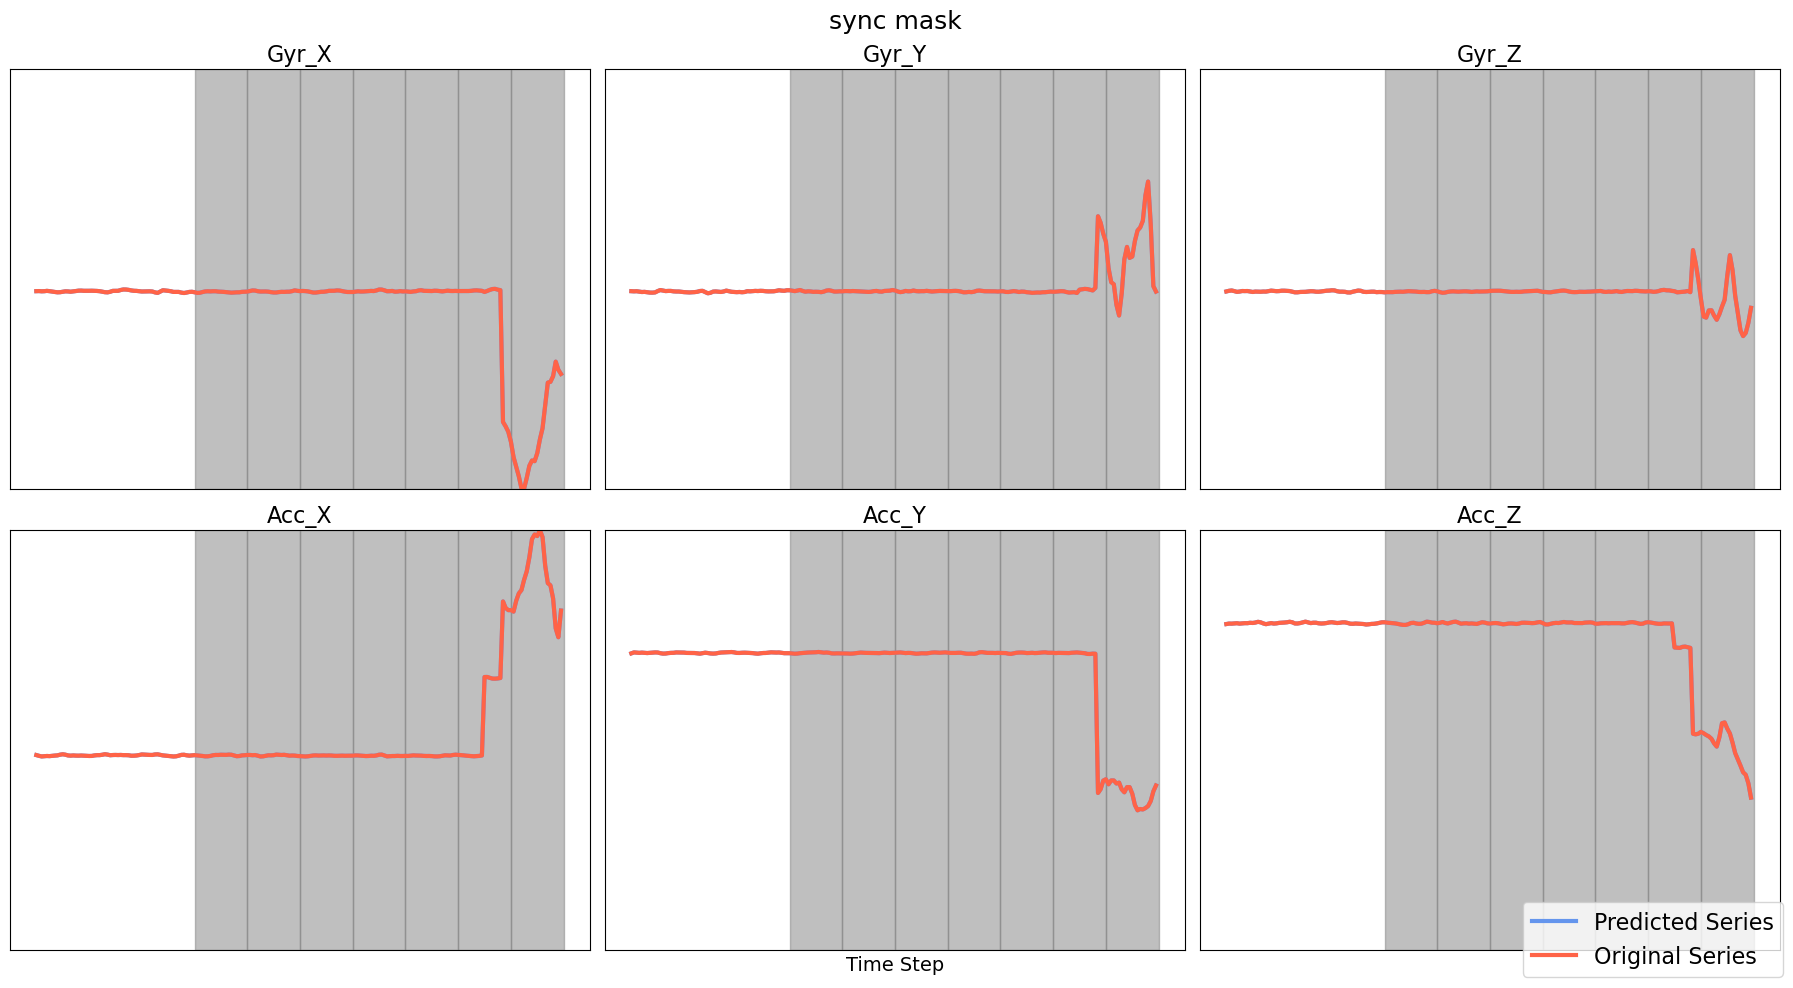

mask_np (6, 10)
predict_series (6, 200)
target_series (6, 200)


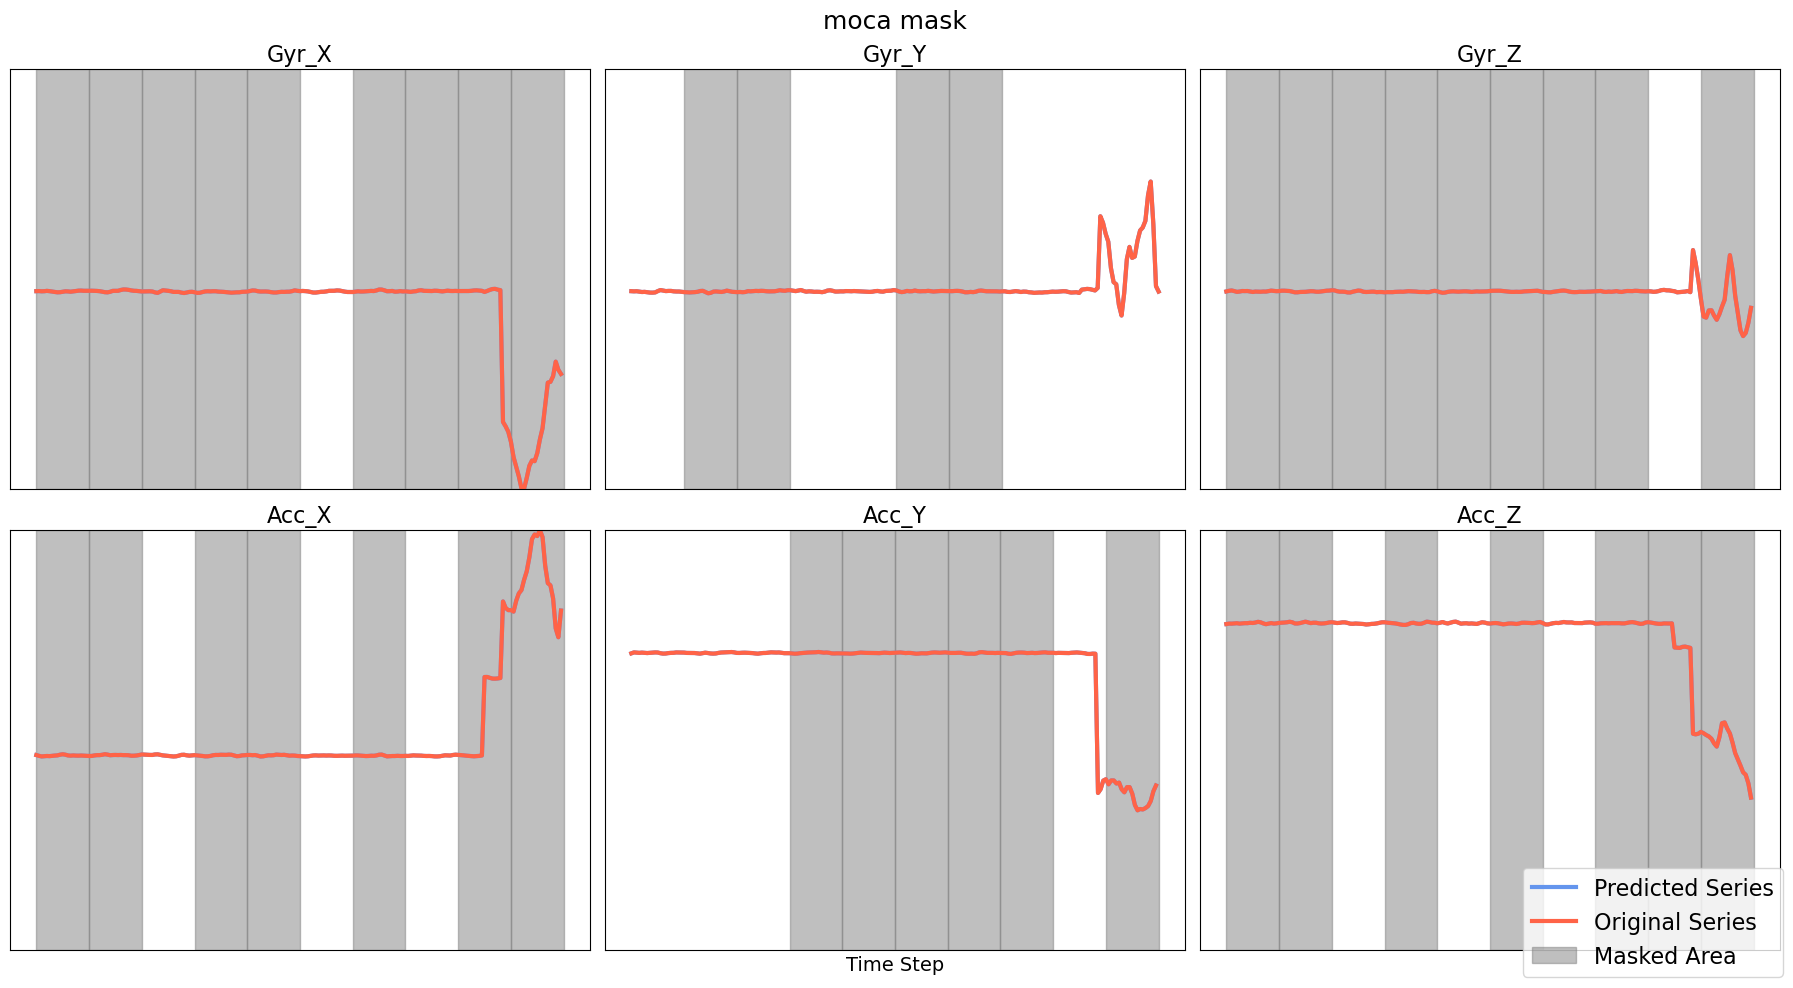

In [ ]:
from util.plot_util import plot_masked_series

plot_masked_series(sync_mask.reshape(shape=(6,10)),transition_sample.squeeze(0),
                           transition_sample.squeeze(0),
                            title = 'sync mask')

plot_masked_series(moca_mask.reshape(shape=(6,10)),transition_sample.squeeze(0),
                           transition_sample.squeeze(0),
                            title = 'moca mask')

### Batch Simulation

In [ ]:
from tqdm import tqdm

# Move model and data to GPU
moca_model = moca_model.cuda()
batch_samples = flattened_samples.cuda() # augmented dataset
print(batch_samples.shape)
#batch_samples = test_seq.cuda()
# Process the batched samples
with torch.no_grad():
    # MOCA Features
    moca_observed_feats, moca_masked_feats,_ = moca_model.bases_view(batch_samples, mask_ratio=0.7)

    # SYNC Features
    sync_observed_feats, sync_masked_feats, _ = moca_model.bases_view(batch_samples,mask_ratio=0.7, masking_scheme='custom_sync')

print(moca_observed_feats.shape,moca_masked_feats.shape)
# calculate mean singular value
sync_singular_list = []
moca_singular_list = []
for i in tqdm(range(batch_samples.shape[0])):
    sync_singular = singular_value(sync_masked_feats[i].cpu(),
                                   sync_observed_feats[i].cpu())
    sync_singular_list.append(sync_singular)
    moca_singular = singular_value(moca_masked_feats[i].cpu(),
                                   moca_observed_feats[i].cpu())
    moca_singular_list.append(moca_singular)
                    
print(np.mean(sync_singular_list),np.mean(moca_singular_list))
    

In [ ]:
import torch

# Toy example
bs = 4  # Batch size
num_patches = 5  # Number of patches
num_features = 3  # Number of features

# Create a random tensor with shape [bs, num_patches, num_features]
x = torch.randn(bs, num_patches, num_features)

# Original (Loop-based) Implementation
probs = []
for i in range(bs):
    cov_matrix = torch.cov(x[i].T)  # Compute covariance matrix per batch instance
    imp_score = torch.sum(torch.abs(cov_matrix), dim=1)  # Sum over rows
    probs.append(imp_score)

probs = torch.stack(probs, dim=0)  # Convert list to tensor [bs, num_patches]

# **Optimized Vectorized Approach**
# Compute covariance matrices for all instances in the batch
cov_matrices = torch.stack([torch.cov(x[i].T) for i in range(bs)])  # Shape: [bs, num_patches, num_patches]

# Compute importance scores
imp_scores = torch.sum(torch.abs(cov_matrices), dim=2)  # Shape: [bs, num_patches]

# Check equivalence
equivalence = torch.allclose(imp_scores, probs)

print("Original (loop-based) output:\n", probs)
print("Optimized (vectorized) output:\n", imp_scores)
print("Are they equal?", equivalence)


Original (loop-based) output:
 tensor([[1.3442, 2.2007, 1.2007],
        [3.0626, 2.6201, 2.1332],
        [1.1079, 3.9967, 2.3579],
        [1.5409, 0.5734, 0.8052]])
Optimized (vectorized) output:
 tensor([[1.3442, 2.2007, 1.2007],
        [3.0626, 2.6201, 2.1332],
        [1.1079, 3.9967, 2.3579],
        [1.5409, 0.5734, 0.8052]])
Are they equal? True


# Finding optim mask

In [30]:
import torch
import numpy as np
from torch.utils.data import DataLoader, RandomSampler
from util.datasets import UCIHAR  # Ensure this module is available
from models_mae import MaskedAutoencoderViT  # Ensure this module is available

# Define necessary arguments
class Args:
    batch_size = 256
    epochs = 400
    input_size = 200
    patch_size = 20
    patch_num = 10
    nvar = 6
    mask_ratio = 0.75
    var_mask_ratio = 0.0
    time_mask_ratio = 0.75
    bert_pos_embed = 0
    normalization = 0
    loss_type = 'all'
    weight_decay = 0.05
    blr = 1e-3
    min_lr = 1e-5
    warmup_epochs = 40
    data_path = 'data/200'
    alt = False
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    seed = 0
    learnable_mask = True
    mix_up = 1
    pre_mix_up = 1
    num_workers = 4
    pin_mem = True

args = Args()

# Set seeds for reproducibility
torch.manual_seed(args.seed)
np.random.seed(args.seed)

# Load dataset
dataset_train = UCIHAR(data_path=args.data_path, is_test=False, normalization=args.normalization, mix_up=args.mix_up, pre_mix_up=args.pre_mix_up)
print('Training samples:', len(dataset_train))

# Use RandomSampler instead of DistributedSampler for Jupyter compatibility
sampler_train = RandomSampler(dataset_train)

# Create DataLoader
data_loader_train = DataLoader(
    dataset_train, sampler=sampler_train,
    batch_size=args.batch_size,
    num_workers=args.num_workers,
    pin_memory=args.pin_mem,
    drop_last=True,
)

# Initialize model
model = MaskedAutoencoderViT(
    img_size=[args.nvar, args.input_size], patch_size=[1, args.patch_size],
    in_chans=1, embed_dim=768, depth=12, num_heads=12,
    decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
    mlp_ratio=4, norm_layer=torch.nn.LayerNorm, learnable_mask=args.learnable_mask
)

model.to(args.device)

# Fetch a single batch from the dataloader
tmp_sample, _ = next(iter(data_loader_train))
tmp_sample = tmp_sample[6:7].to(args.device)

print("Sample shape:", tmp_sample.shape)


/home/jovyan/MAE_Accelerometer/util/datasets.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(torch.load(x_train_dir),dtype=torch.float32)


Training samples: 369400
Sample shape: torch.Size([1, 1, 6, 200])


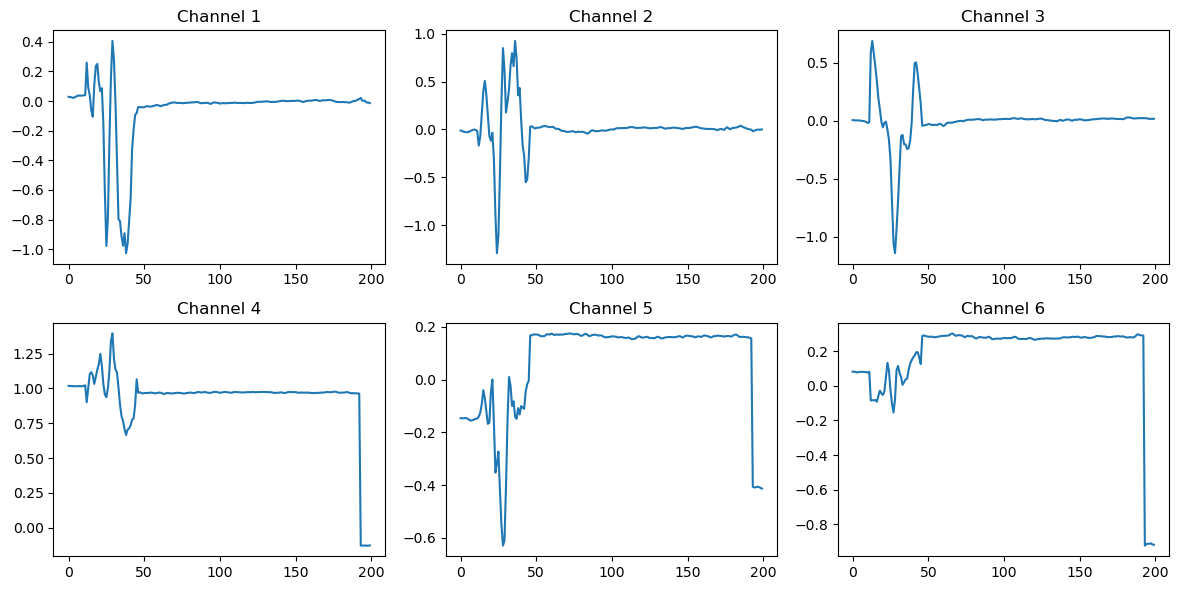

In [31]:
import matplotlib.pyplot as plt
x = tmp_sample.squeeze().cpu()
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i in range(6):
    ax = axes[i // 3, i % 3]  # Convert index to 2D grid
    ax.plot(x[i])
    ax.set_title(f"Channel {i+1}")

plt.tight_layout()
plt.show()

**step1: calculate the singular value for all pair-wise patches(this time using raw patch instead of latent)**

In [32]:
x_p = model.patchify(tmp_sample).squeeze()
x_p.shape


torch.Size([60, 20])

In [33]:
from covariance import singular_value
x_p = x_p.cpu()
N = x_p.shape[0]
corr_matrix = torch.zeros(N,N)
for i in range(N):
    for j in range(N):
        corr_matrix[i,j] = singular_value(x_p[i].unsqueeze(0),x_p[j].unsqueeze(0))

In [34]:
corr_matrix.shape

torch.Size([60, 60])

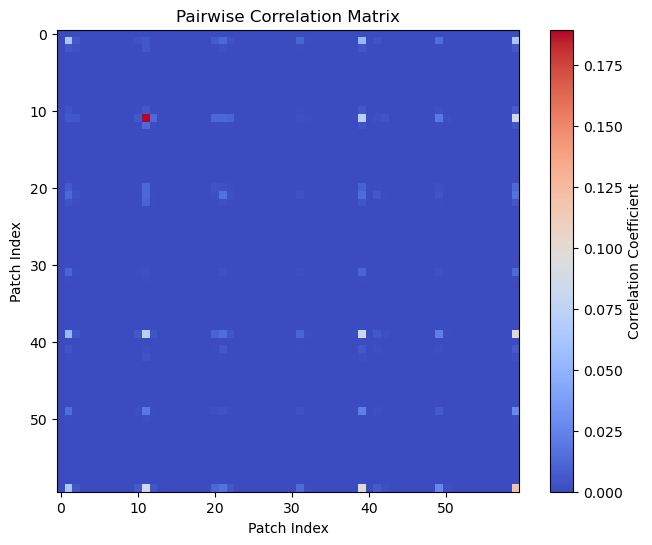

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation Coefficient")
plt.title("Pairwise Correlation Matrix")
plt.xlabel("Patch Index")
plt.ylabel("Patch Index")
plt.show()

**step2: find top correlation patch**

In [36]:
import torch
import numpy as np
import pandas as pd

# Assuming corr_matrix is a PyTorch tensor
if isinstance(corr_matrix, torch.Tensor):
    corr_matrix = corr_matrix.numpy()  # Convert to NumPy array

# Compute importance scores by summing absolute correlations for each row
importance_scores = np.sum(np.abs(corr_matrix), axis=1)

# Rank patches from most to least important
ranking = np.argsort(importance_scores)[::-1]  # Descending order

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Patch Index': np.arange(len(corr_matrix)), 'Importance Score': importance_scores})
importance_df = importance_df.iloc[ranking].reset_index(drop=True)

importance_df.head(5)


,Patch Index,Importance Score
0,59,0.472212
1,11,0.445139
2,39,0.394636
3,1,0.250300
4,49,0.107664


In [37]:
# Determine the cutoff index for masking the first 75%
num_patches = len(corr_matrix)
cutoff = int(0.75 * num_patches)

# Create a mask: 0 for masked (first 75%), 1 for unmasked (last 25%)
mask = np.zeros(num_patches, dtype=int)
mask[ranking[:cutoff]] = 1  # Mask the most important patches
mask = mask.reshape(6,10)
mask

array([[1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 1]])

/home/jovyan/MAE_Accelerometer/engine_pretrain.py:182: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(right=0.8)  # Make space for the legend


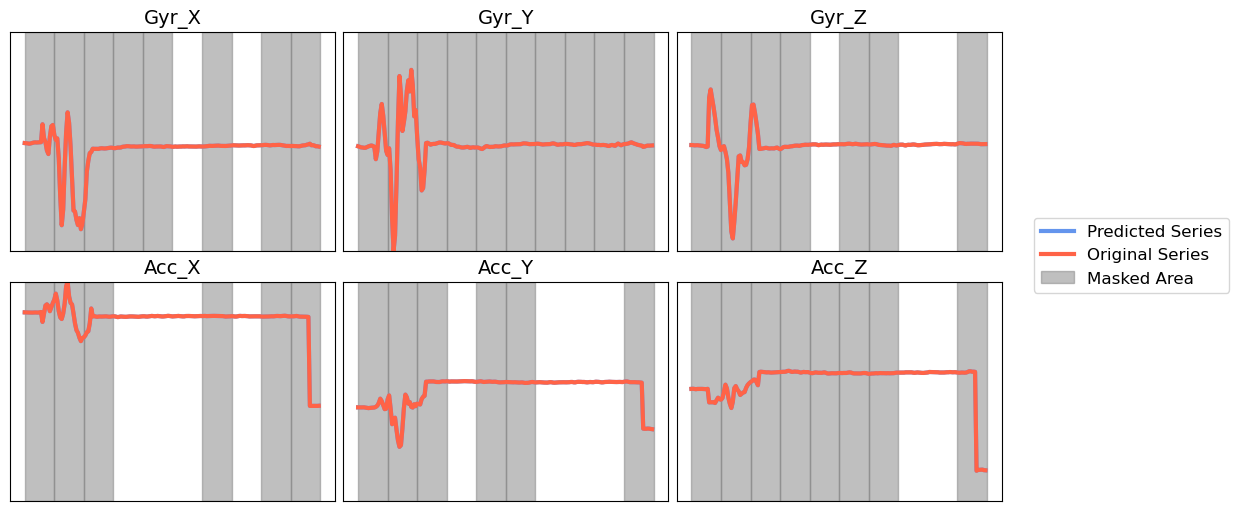

In [38]:
from engine_pretrain import plot_masked_series

fig = plot_masked_series(torch.from_numpy(mask).cpu(),x.cpu(),x.cpu())

**Try using only cross covariance**

In [ ]:
x_p = x_p.cpu()
N = x_p.shape[0]
corr_matrix = torch.zeros(N,N)
for i in range(N):
    for j in range(N):
        corr_matrix[i,j] = torch.from_numpy(crosscovariance(x_p[i].unsqueeze(0),
                                                            x_p[j].unsqueeze(0)))

In [ ]:
import torch
import numpy as np
import pandas as pd

# Assuming corr_matrix is a PyTorch tensor
if isinstance(corr_matrix, torch.Tensor):
    corr_matrix = corr_matrix.numpy()  # Convert to NumPy array

# Compute importance scores by summing absolute correlations for each row
importance_scores = np.sum(np.abs(corr_matrix), axis=1)

# Rank patches from most to least important
ranking = np.argsort(importance_scores)[::-1]  # Descending order

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Patch Index': np.arange(len(corr_matrix)), 'Importance Score': importance_scores})
importance_df = importance_df.iloc[ranking].reset_index(drop=True)

importance_df.head(5)


,Patch Index,Importance Score
0,3,1.691908
1,49,1.488025
2,9,1.324932
3,19,1.034515
4,47,1.021220


In [ ]:
# Determine the cutoff index for masking the first 75%
num_patches = len(corr_matrix)
cutoff = int(0.75 * num_patches)

# Create a mask: 0 for masked (first 75%), 1 for unmasked (last 25%)
mask = np.zeros(num_patches, dtype=int)
mask[ranking[:cutoff]] = 1  # Mask the most important patches
mask = mask.reshape(6,10)
mask

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1]])

/home/jovyan/MAE_Accelerometer/engine_pretrain.py:182: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(right=0.8)  # Make space for the legend


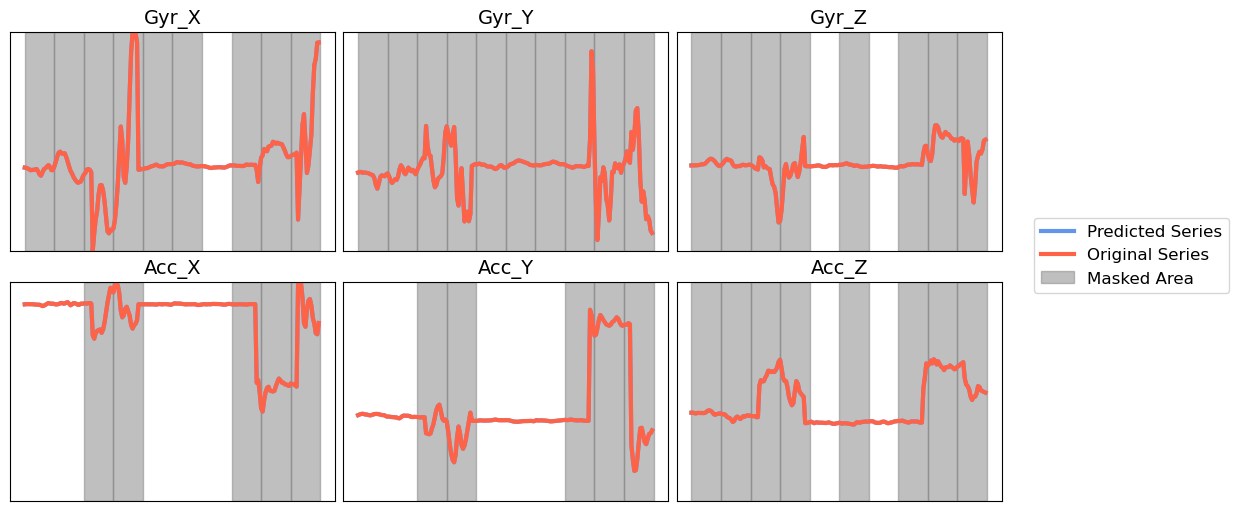

In [ ]:
from engine_pretrain import plot_masked_series

fig = plot_masked_series(torch.from_numpy(mask).cpu(),x.cpu(),x.cpu())

**Validate if that mask gives higher MI**

In [ ]:
# one example
#A = abs_cov_matrix
R = list(ranking[:cutoff])
Rc = list(set(range(60)) - set(R))

mask_feat = x_p[R]
unmask_feat = x_p[Rc]
sv = singular_value(mask_feat,unmask_feat)
sv

6.988679256509263e-05

In [ ]:
# from tqdm import tqdm

# # Move model and data to GPU
# moca_model = moca_model.cuda()
# batch_samples = flattened_samples.cuda() # augmented dataset
# print(batch_samples.shape)
# #batch_samples = test_seq.cuda()
# # Process the batched samples
# with torch.no_grad():
#     # MOCA Features
#     moca_observed_feats, moca_masked_feats,_ = moca_model.bases_view(batch_samples, mask_ratio=0.7)

#     # SYNC Features
#     sync_observed_feats, sync_masked_feats, _ = moca_model.bases_view(batch_samples,mask_ratio=0.7, masking_scheme='custom_sync')

# print(moca_observed_feats.shape,moca_masked_feats.shape)
# # calculate mean singular value
# sync_singular_list = []
# moca_singular_list = []
# for i in tqdm(range(batch_samples.shape[0])):
#     sync_singular = singular_value(sync_masked_feats[i].cpu(),
#                                    sync_observed_feats[i].cpu())
#     sync_singular_list.append(sync_singular)
#     moca_singular = singular_value(moca_masked_feats[i].cpu(),
#                                    moca_observed_feats[i].cpu())
#     moca_singular_list.append(moca_singular)
                    
# print(np.mean(sync_singular_list),np.mean(moca_singular_list))
    

**The Singular Value solver appears to give super hard mask, maybe we can use it as a prior information to generate task**

In [ ]:
model_checkpoint = torch.load('/home/jovyan/persistent-data/leo/optim_mask/ckpt/moca_learnmask_2025-02-08_19-05/moca_learnmask_checkpoint-100.pth',map_location='cpu')
msg = model.load_state_dict(model_checkpoint['model'], strict=False)
print(msg)

<All keys matched successfully>


In [ ]:
with torch.no_grad():
    loss, pred, mask = model(tmp_sample,mask_ratio=0.7)

In [ ]:
pred = model.unpatchify(pred)
pred.shape

torch.Size([1, 1, 6, 200])

In [ ]:
mask = mask.reshape(6,10)

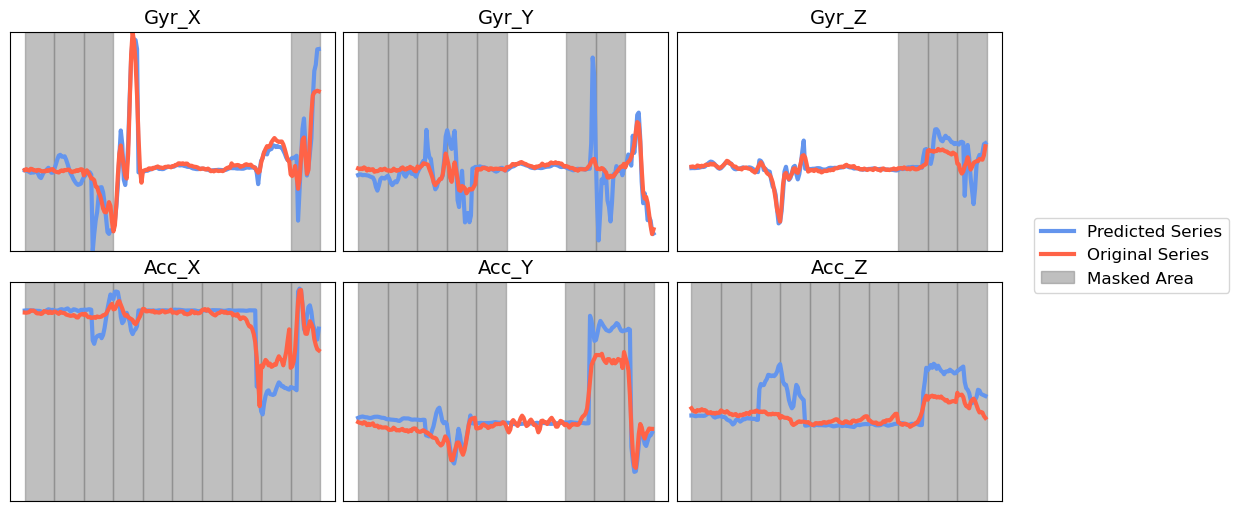

In [ ]:
fig2 = plot_masked_series(mask,x,pred)

## Submatrix Selection

**If choosing 0.15N from N has complexity of O(2^N), impossible**

In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader, RandomSampler
from util.datasets import UCIHAR  # Ensure this module is available
from models_mae import MaskedAutoencoderViT  # Ensure this module is available

# Define necessary arguments
class Args:
    batch_size = 256
    epochs = 400
    input_size = 200
    patch_size = 20
    patch_num = 10
    nvar = 6
    mask_ratio = 0.75
    var_mask_ratio = 0.0
    time_mask_ratio = 0.75
    bert_pos_embed = 0
    normalization = 0
    loss_type = 'all'
    weight_decay = 0.05
    blr = 1e-3
    min_lr = 1e-5
    warmup_epochs = 40
    data_path = 'data/200'
    alt = False
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    seed = 0
    learnable_mask = True
    mix_up = 1
    pre_mix_up = 1
    num_workers = 4
    pin_mem = True

args = Args()

# Set seeds for reproducibility
torch.manual_seed(args.seed)
np.random.seed(args.seed)

# Load dataset
dataset_train = UCIHAR(data_path=args.data_path, is_test=False, normalization=args.normalization, mix_up=args.mix_up, pre_mix_up=args.pre_mix_up)
print('Training samples:', len(dataset_train))

# Use RandomSampler instead of DistributedSampler for Jupyter compatibility
sampler_train = RandomSampler(dataset_train)

# Create DataLoader
data_loader_train = DataLoader(
    dataset_train, sampler=sampler_train,
    batch_size=args.batch_size,
    num_workers=args.num_workers,
    pin_memory=args.pin_mem,
    drop_last=True,
)

# Initialize model
model = MaskedAutoencoderViT(
    img_size=[args.nvar, args.input_size], patch_size=[1, args.patch_size],
    in_chans=1, embed_dim=768, depth=12, num_heads=12,
    decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
    mlp_ratio=4, norm_layer=torch.nn.LayerNorm, learnable_mask=args.learnable_mask
)

model.to(args.device)

# Fetch a single batch from the dataloader
tmp_sample, _ = next(iter(data_loader_train))
tmp_sample = tmp_sample[6:7].to(args.device)

print("Sample shape:", tmp_sample.shape)


/home/jovyan/MAE_Accelerometer/util/datasets.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(torch.load(x_train_dir),dtype=torch.float32)


Training samples: 369400
Sample shape: torch.Size([1, 1, 6, 200])


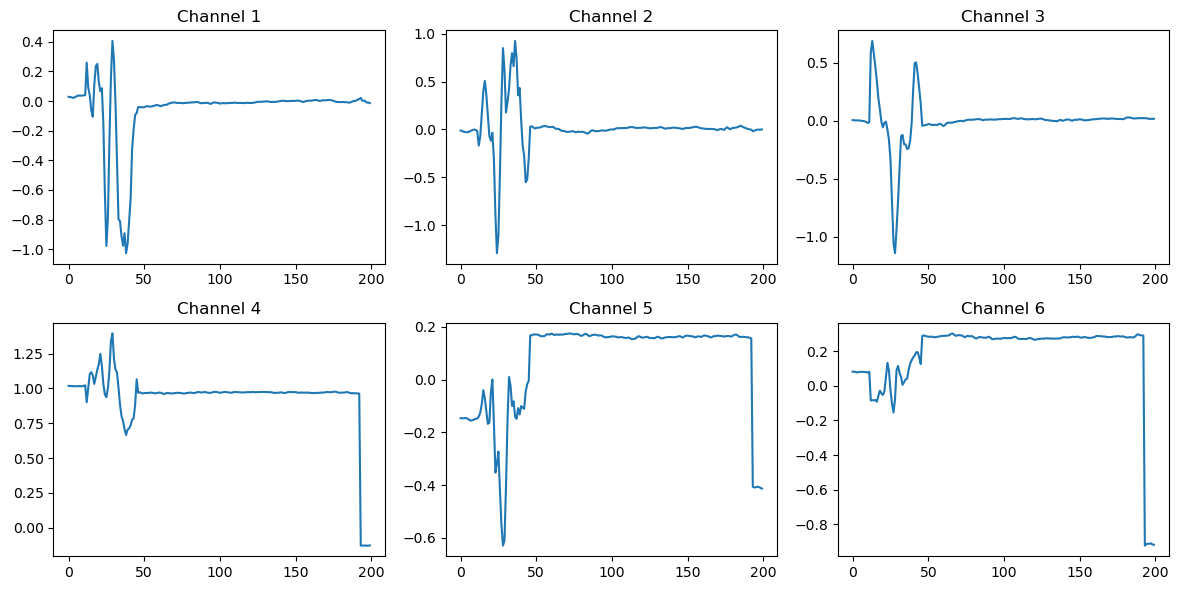

In [2]:
import matplotlib.pyplot as plt
x = tmp_sample.squeeze().cpu()
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i in range(6):
    ax = axes[i // 3, i % 3]  # Convert index to 2D grid
    ax.plot(x[i])
    ax.set_title(f"Channel {i+1}")

plt.tight_layout()
plt.show()

In [3]:
x_p = model.patchify(tmp_sample).squeeze()
x_p.shape


torch.Size([60, 20])

**Calculate the covariance matrix (confirmed that it's symmetric)**

In [4]:
cov_matrix = torch.cov(x_p)
cov_matrix.shape

torch.Size([60, 60])

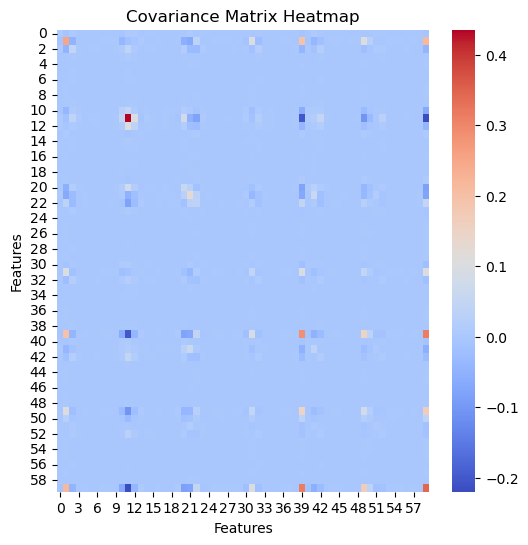

In [5]:
# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

cov_matrix_np = cov_matrix.cpu().numpy()

plt.figure(figsize=(6, 6))
sns.heatmap(cov_matrix_np, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)

plt.title("Covariance Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

**consider the absolute correlatino**

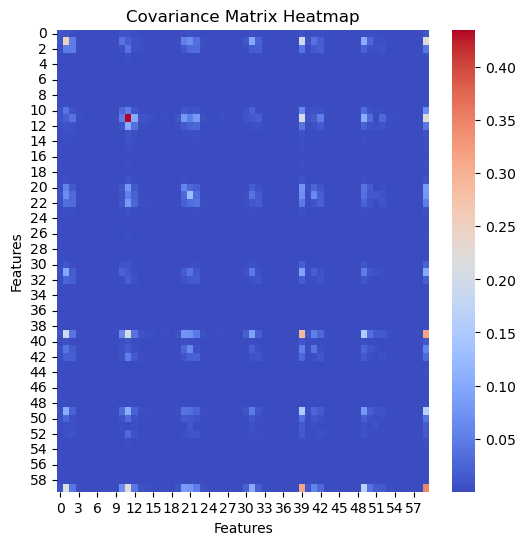

In [6]:
# Plot the heatmap
abs_cov_matrix = np.abs(cov_matrix_np)

plt.figure(figsize=(6, 6))
sns.heatmap(abs_cov_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)

plt.title("Covariance Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

**Approach1: With the above covariance matrix A, we want to select a submatrix with S,T. where S selecting row and T selecting columns, in a way that SAT. We want to optimize S,T that SAT has the largest singular value. Note that S and T complement each other.**

**Is an NP-hard question, even one example that has dimension 60x60 will takes around 3000 year to compute**

**Try Greedy Algorithm**

In [13]:
import numpy as np
import time
from covariance import singular_value
from tqdm import tqdm

def row_selection_matrix(R, n):
    S = np.zeros((len(R), n), dtype=float)
    for i, r_idx in enumerate(R):
        S[i, r_idx] = 1.0
    return S

def col_selection_matrix(C, n):
    T = np.zeros((n, len(C)), dtype=float)
    for j, c_idx in enumerate(C):
        T[c_idx, j] = 1.0
    return T

def greedy_find_S_T(A, max_size=None, tol=1e-4):
    """
    Greedy algorithm to find the best row and column selection.
    
    Args:
        A: Input square matrix (n x n)
        max_size: Maximum number of rows/columns to select
        tol: Stopping criterion for singular value improvement
        
    Returns:
        best_S, best_T: Selected row and column matrices
        best_R: Selected row indices
        best_sv: Best found singular value
    """
    n = A.shape[0]
    if max_size is None:
        max_size = n // 2  # Default: Select up to half the rows

    start_time = time.time()

    R = []  # Start with an empty row selection
    best_sv = 0
    best_S = None
    best_T = None

    all_indices = set(range(n))
    
    for _ in tqdm(range(max_size)):
        best_candidate = None
        best_new_sv = 0

        for r in all_indices - set(R):
            new_R = R + [r]
            Rc = list(all_indices - set(new_R))  # Complement columns

            mask_feats = A[new_R]
            unmask_feats = A[Rc]
       
            sv = singular_value(mask_feats,unmask_feats)
        
            
            if sv > best_new_sv:
                best_new_sv = sv
                best_candidate = r

        R.append(best_candidate)
        best_sv = best_new_sv

    best_S = row_selection_matrix(R, n)
    best_T = col_selection_matrix(list(all_indices - set(R)), n)

    end_time = time.time()
    elapsed_time = end_time - start_time

    return best_S, best_T, R, best_sv, elapsed_time

# Example usage
A = x_p.cpu().numpy()
S, T, R, sv, elapsed = greedy_find_S_T(A, max_size=15)

print("Selected Rows:", sorted(R))
print("Number of Rows:", len(R))
print("Largest Singular Value:", sv)
print("Total Time (seconds):", elapsed) # 7 second for one samle


  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:07<00:00,  2.04it/s]

Selected Rows: [3, 5, 6, 9, 27, 28, 33, 34, 37, 39, 46, 47, 48, 57, 59]
Number of Rows: 15
Largest Singular Value: 0.3201224
Total Time (seconds): 7.337277412414551


/home/jovyan/MAE_Accelerometer/engine_pretrain.py:182: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(right=0.8)  # Make space for the legend


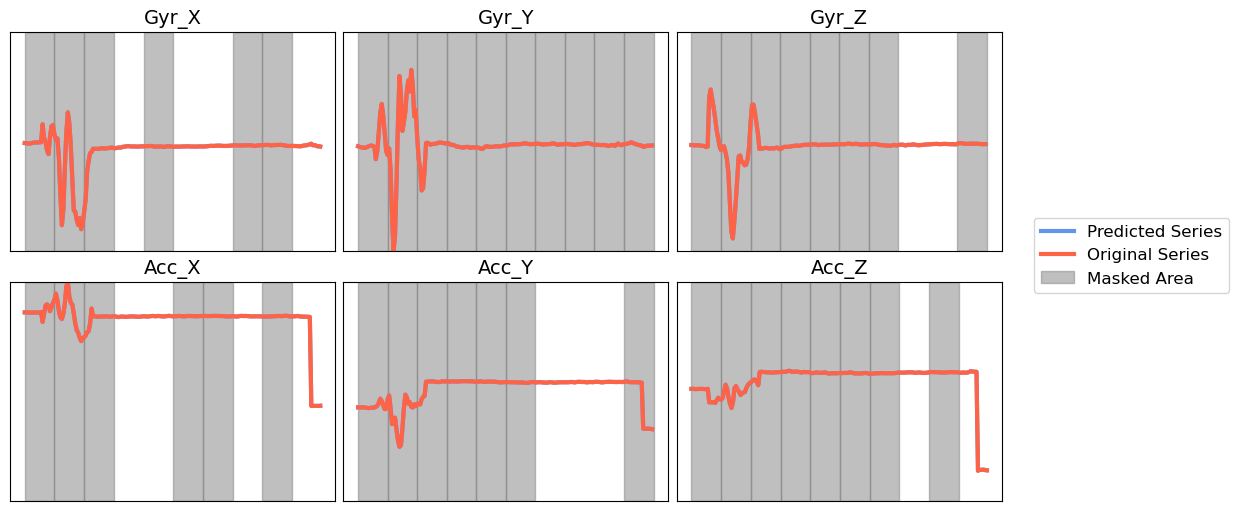

In [8]:
from engine_pretrain import plot_masked_series

mask = np.ones(60, dtype=int)
mask[R] = 0  # Mask the most important patches
mask = mask.reshape(6,10)
mask

fig = plot_masked_series(torch.from_numpy(mask).cpu(),x.cpu(),x.cpu())

**Above is too slow， because of singular value involve square root of matirx, which is inefficient. try using covariance and spectral norm**

**Spectral Norm Approach**

In [29]:
import numpy as np
import time

def row_selection_matrix(R, n):
    S = np.zeros((len(R), n), dtype=float)
    for i, r_idx in enumerate(R):
        S[i, r_idx] = 1.0
    return S

def col_selection_matrix(C, n):
    T = np.zeros((n, len(C)), dtype=float)
    for j, c_idx in enumerate(C):
        T[c_idx, j] = 1.0
    return T

def greedy_find_S_T(A, max_size=None, tol=1e-4):
    """
    Greedy algorithm to find the best row and column selection.
    
    Args:
        A: Input square matrix (n x n)
        max_size: Maximum number of rows/columns to select
        tol: Stopping criterion for singular value improvement
        
    Returns:
        best_S, best_T: Selected row and column matrices
        best_R: Selected row indices
        best_sv: Best found singular value
    """
    n = A.shape[0]
    if max_size is None:
        max_size = n // 2  # Default: select up to half of the rows
    R = []
    all_indices = set(range(n))
    best_sv = 0
    start_time = time.time()
    
    for _ in range(max_size):
        best_candidate = None
        best_new_sv = 0
        for r in sorted(all_indices - set(R)):
            new_R = R + [r]
            Rc = sorted(list(all_indices - set(new_R)))
            # Extract submatrix using np.ix_ for proper indexing
            M = A[np.ix_(new_R, Rc)]
            sv = np.linalg.norm(M, 2)  # Compute the spectral norm
            if sv > best_new_sv:
                best_new_sv = sv
                best_candidate = r
        R.append(best_candidate)
        best_sv = best_new_sv

    best_S = np.eye(n)[R, :]  # Selection matrix for rows
    Rc_final = sorted(list(all_indices - set(R)))
    best_T = np.eye(n)[:, Rc_final]  # Selection matrix for columns
    
    elapsed_time = time.time() - start_time
    return best_S, best_T, R, best_sv, elapsed_time
    
# Example usage
A = abs_cov_matrix # (60,60)
S, T, R, sv, elapsed = greedy_find_S_T(A, max_size=15)

print("Selected Rows:", sorted(R))
print("Number of Rows:", len(R))
print("Largest Singular Value:", sv)
print("Total Time (seconds):", elapsed)

Selected Rows: [0, 2, 3, 9, 12, 13, 22, 27, 32, 39, 42, 48, 52, 58, 59]
Number of Rows: 15
Largest Singular Value: 0.5589272
Total Time (seconds): 0.03622722625732422


15

In [20]:
x_p = x_p.cpu()
x_p.shape

torch.Size([60, 20])

In [27]:
# get masked view and unmasked view according to R
mask_feats = x_p[R]
unmask_feats = x_p[list(set(range(60)) - set(R))]

print(mask_feats.shape, unmask_feats.shape)

torch.Size([15, 20]) torch.Size([45, 20])


In [28]:
singular_value(mask_feats,unmask_feats) # smaller than the previous one

0.31804472

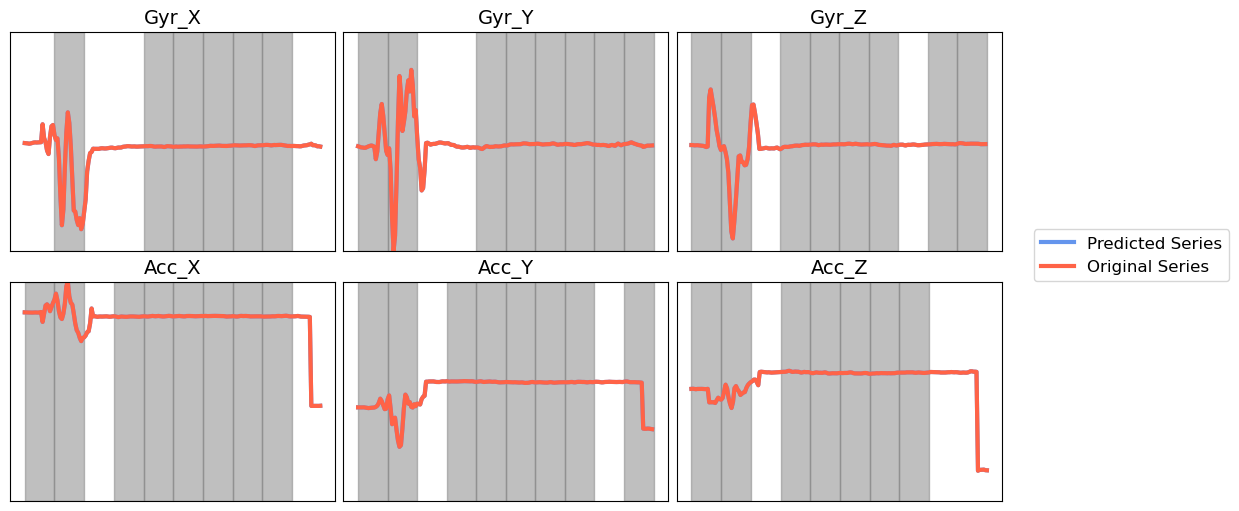

In [11]:
from engine_pretrain import plot_masked_series

mask = np.ones(60, dtype=int)
mask[R] = 0  
mask = mask.reshape(6,10)
mask

fig = plot_masked_series(torch.from_numpy(mask).cpu(),x.cpu(),x.cpu())

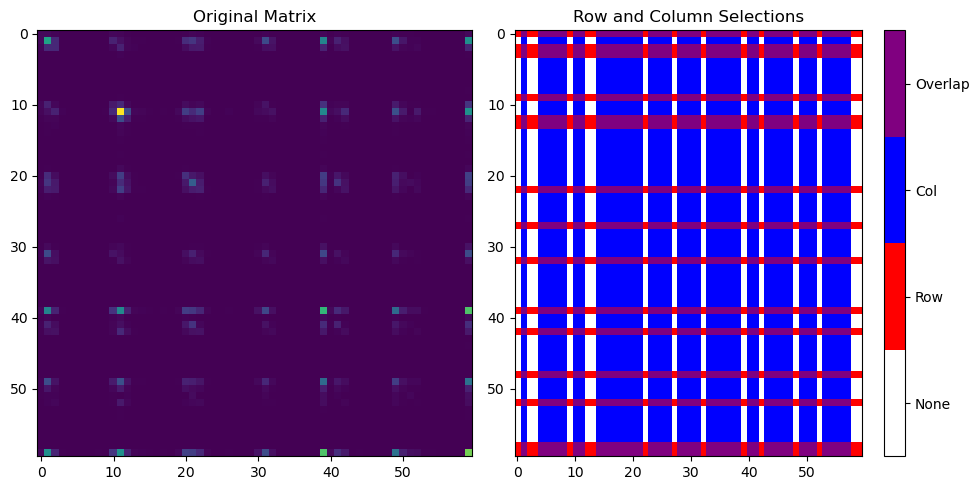

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_selections(A, selected_rows):
    n = A.shape[0]
    selected_cols = list(set(range(n)) - set(selected_rows))

    # Create a highlight matrix:
    # 0 = not selected, 1 = selected row, 2 = selected column, 3 = overlap
    highlight = np.zeros((n, n), dtype=int)

    # Mark rows
    highlight[selected_rows, :] = 1

    # Mark columns
    for col in selected_cols:
        # Wherever there is already 1, set it to 3 (overlap).
        # Otherwise, set it to 2.
        overlap_mask = highlight[:, col] == 1
        highlight[overlap_mask, col] = 3
        highlight[~overlap_mask, col] = 2

    # Define a discrete colormap: white, red, blue, purple
    cmap = ListedColormap(["white", "red", "blue", "purple"])

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(A, cmap="viridis", aspect="auto")
    axs[0].set_title("Original Matrix")

    # Use 'highlight' values to color each cell based on selection status
    im = axs[1].imshow(highlight, cmap=cmap, aspect="auto", vmin=0, vmax=3)
    axs[1].set_title("Row and Column Selections")

    cbar = plt.colorbar(im, ax=axs[1], ticks=[0.375, 1.125, 1.875, 2.625])
    cbar.ax.set_yticklabels(["None", "Row", "Col", "Overlap"])

    plt.tight_layout()
    plt.show()


visualize_selections(A, R)


**Approach2: Treat it as a weighted graph, where the covariance is the weight, devide the graph into two subgraph such that element in each subgraph has small weight, but the correlation between the two subgraph is large.**

## Max-Cut

In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader, RandomSampler
from util.datasets import UCIHAR  # Ensure this module is available
from models_mae import MaskedAutoencoderViT  # Ensure this module is available

# Define necessary arguments
class Args:
    batch_size = 256
    epochs = 400
    input_size = 200
    patch_size = 20
    patch_num = 10
    nvar = 6
    mask_ratio = 0.75
    var_mask_ratio = 0.0
    time_mask_ratio = 0.75
    bert_pos_embed = 0
    normalization = 0
    loss_type = 'all'
    weight_decay = 0.05
    blr = 1e-3
    min_lr = 1e-5
    warmup_epochs = 40
    data_path = 'data/200'
    alt = False
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    seed = 0
    learnable_mask = True
    mix_up = 0
    pre_mix_up = 0
    num_workers = 4
    pin_mem = True

args = Args()

# Set seeds for reproducibility
torch.manual_seed(args.seed)
np.random.seed(args.seed)

# Load dataset
dataset_train = UCIHAR(data_path=args.data_path, is_test=False, normalization=args.normalization, mix_up=args.mix_up, pre_mix_up=args.pre_mix_up)
print('Training samples:', len(dataset_train))

# Use RandomSampler instead of DistributedSampler for Jupyter compatibility
sampler_train = RandomSampler(dataset_train)

# Create DataLoader
data_loader_train = DataLoader(
    dataset_train, sampler=sampler_train,
    batch_size=args.batch_size,
    num_workers=args.num_workers,
    pin_memory=args.pin_mem,
    drop_last=True,
)

# # Initialize model
model = MaskedAutoencoderViT(
    img_size=[args.nvar, args.input_size], patch_size=[1, args.patch_size],
    in_chans=1, embed_dim=768, depth=12, num_heads=12,
    decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
    mlp_ratio=4, norm_layer=torch.nn.LayerNorm, learnable_mask=args.learnable_mask
)

model.to(args.device)




/Users/leo/Desktop/MAE_Accelerometer/util/datasets.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.X = torch.tensor(torch.load(X_train_dir),dtype=torch.float32).pe

Training samples: 1847


MaskedAutoencoderViT(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 768, kernel_size=(1, 20), stride=(1, 20))
    (norm): Identity()
  )
  (leanrable_masking): LearnableMask(
    (mask_generator): Linear(in_features=768, out_features=1, bias=True)
  )
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=Fals

Sample shape: torch.Size([1, 1, 6, 200])


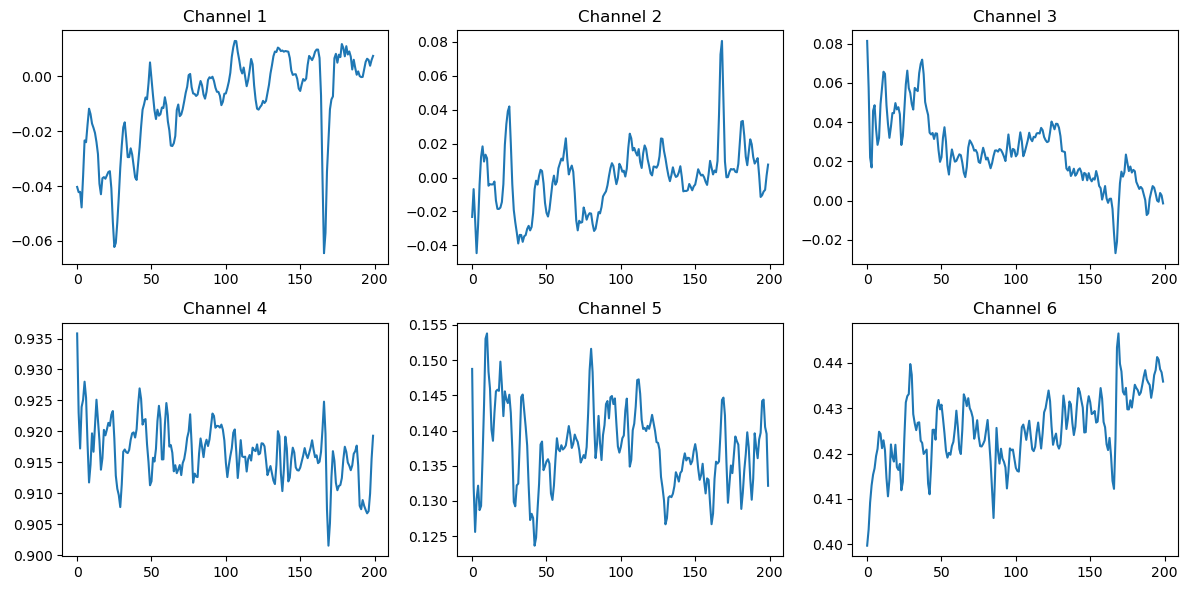

In [2]:
import matplotlib.pyplot as plt
# Fetch a single batch from the dataloader
tmp_sample, _ = next(iter(data_loader_train))
tmp_sample = tmp_sample[7:8].to(args.device)

print("Sample shape:", tmp_sample.shape)

x = tmp_sample.squeeze().cpu()
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i in range(6):
    ax = axes[i // 3, i % 3]  # Convert index to 2D grid
    ax.plot(x[i])
    ax.set_title(f"Channel {i+1}")

plt.tight_layout()
plt.show()

In [3]:
x_p = model.patchify(tmp_sample).squeeze()
x_p.shape


torch.Size([60, 20])

In [4]:
tmp_cov_matrix = torch.abs(torch.cov(x_p))
tmp_cov_matrix.shape

torch.Size([60, 60])

In [5]:
C = tmp_cov_matrix
R = C / C.abs().max()
R


tensor([[0.1653, 0.0086, 0.1031,  ..., 0.0109, 0.0617, 0.0030],
        [0.0086, 0.2197, 0.0089,  ..., 0.0107, 0.1029, 0.0027],
        [0.1031, 0.0089, 0.1293,  ..., 0.0016, 0.0587, 0.0042],
        ...,
        [0.0109, 0.0107, 0.0016,  ..., 0.0119, 0.0062, 0.0027],
        [0.0617, 0.1029, 0.0587,  ..., 0.0062, 0.1095, 0.0025],
        [0.0030, 0.0027, 0.0042,  ..., 0.0027, 0.0025, 0.0080]])

In [6]:
import numpy as np

def compute_cut_value(W, x):
    """
    Compute the cut value for partition x.
    W is the weight matrix (symmetric 10x10 matrix).
    x is a numpy array of shape (10,) with entries +1 or -1.
    """
    # The cut value is given by 1/2 sum_{i,j} W[i,j] (1 - x[i]*x[j])
    return 0.5 * np.sum(W * (1 - np.outer(x, x)))

def mod_local_search(W, x_init, max_iter=1000, perturb_prob=0.1):
    """
    Mod-Local Search algorithm for the max-cut problem.
    W is the weight matrix.
    x_init is the initial partition (numpy array of +1 or -1).
    max_iter is the maximum number of iterations.
    perturb_prob is the probability of performing a random perturbation when no improvement is found.
    """
    n = len(x_init)
    x = x_init.copy()
    current_value = compute_cut_value(W, x)
    
    for iteration in range(max_iter):
        improved = False
        
        # Try to flip each node if it improves the cut
        for i in range(n):
            # Compute the improvement if x[i] is flipped
            # Delta = sum_j W[i,j] * x[i] * x[j]
            delta = np.sum(W[i, :] * x[i] * x)
            if delta > 0:
                x[i] = -x[i]
                current_value += delta
                improved = True

        # If no improvement, apply a random perturbation with a small probability
        if not improved:
            if np.random.rand() < perturb_prob:
                i = np.random.randint(n)
                # Compute the change due to the perturbation (for logging purposes)
                delta = np.sum(W[i, :] * x[i] * x)
                x[i] = -x[i]
                current_value += delta
            else:
                # If no perturbation is made, assume convergence
                break
                
    return x, current_value



In [7]:
# We ignore the diagonal and use off-diagonal values as edge weights.
W = R.numpy()
np.fill_diagonal(W, 0)
num_node = W.shape[0]
# Start with a random partition of the 10 nodes
x_init = np.random.choice([-1, 1], size=num_node)
print('init value:',compute_cut_value(W, x_init))

# Run the Mod-Local Search algorithm
solution, cut_value = mod_local_search(W, x_init, max_iter=1000, perturb_prob=0.1)

print("Final partition (x):", solution)
print("Cut value:", cut_value)

init value: 50.41477412774111
Final partition (x): [-1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1
  1 -1 -1  1 -1  1  1  1 -1  1  1  1]
Cut value: 51.824008944107845


In [8]:
mask = (solution + 1) // 2
mask = mask.reshape(6,10)
print(mask)

[[0 0 0 0 0 1 0 0 1 1]
 [1 0 1 1 0 0 0 1 0 1]
 [0 1 0 0 0 0 1 0 1 1]
 [1 0 1 0 1 1 1 1 0 1]
 [1 1 0 0 1 0 1 1 1 0]
 [0 1 0 1 1 1 0 1 1 1]]


/Users/leo/Desktop/MAE_Accelerometer/engine_pretrain.py:182: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(right=0.8)  # Make space for the legend


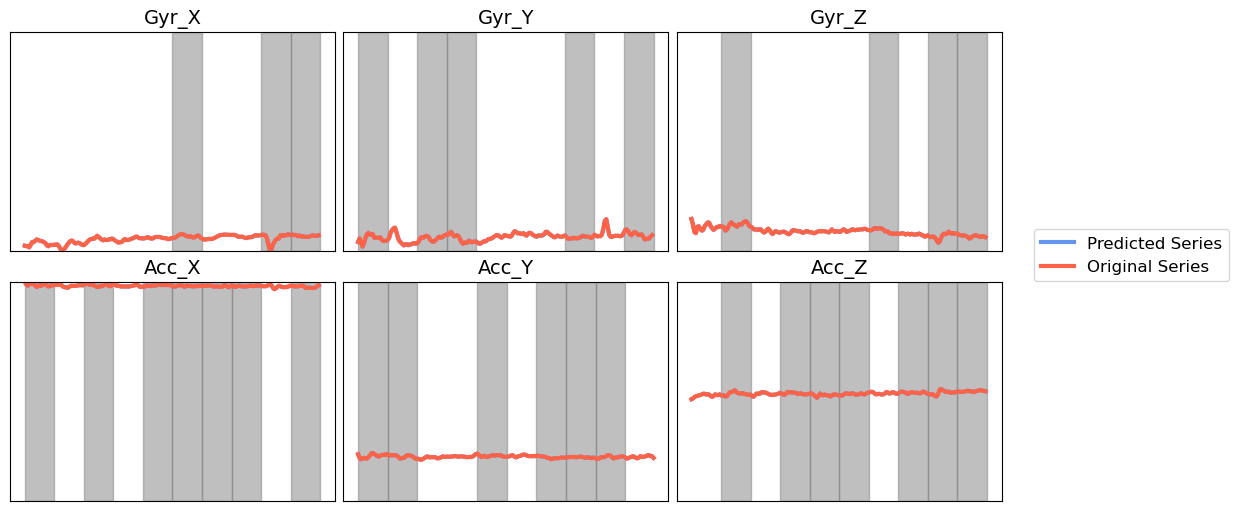

In [9]:
from engine_pretrain import plot_masked_series

fig = plot_masked_series(torch.from_numpy(mask),x,x)

In [10]:
# count how many 1s
np.sum(mask)

32

In [11]:
import numpy as np

def compute_cut_value(W, x):
    """
    Compute the cut value for partition x.
    W is the weight matrix (symmetric 10x10 matrix).
    x is a numpy array of shape (10,) with entries +1 (masked) or -1 (unmasked).
    """
    return 0.5 * np.sum(W * (1 - np.outer(x, x)))

def mod_local_search_fixed(W, x_init, num_unmasked, max_iter=1000, perturb_prob=0.1):
    """
    Mod-Local Search algorithm for the max-cut problem with a fixed set size constraint.
    W is the weight matrix.
    x_init is the initial partition (numpy array of +1 or -1) such that
         the number of unmasked nodes (with value -1) equals num_unmasked.
    num_unmasked is the required number of unmasked nodes.
    max_iter is the maximum number of iterations.
    perturb_prob is the probability of performing a random swap when no improvement is found.
    """
    n = len(x_init)
    # Check that the initial partition satisfies the constraint.
    if np.sum(x_init == -1) != num_unmasked:
        raise ValueError("Initial partition does not satisfy the unmasked set size constraint.")

    x = x_init.copy()
    current_value = compute_cut_value(W, x)
    
    for iteration in range(max_iter):
        improved = False
        
        # Loop over pairs (i, j) with i masked (+1) and j unmasked (-1)
        for i in range(n):
            if x[i] == 1:
                for j in range(n):
                    if x[j] == -1:
                        # Create a new partition by swapping i and j
                        x_new = x.copy()
                        x_new[i], x_new[j] = -1, 1
                        new_value = compute_cut_value(W, x_new)
                        if new_value > current_value:
                            x = x_new
                            current_value = new_value
                            improved = True
                            break
                if improved:
                    break
        
        # If no improving swap is found, try a random swap with probability perturb_prob.
        if not improved:
            if np.random.rand() < perturb_prob:
                masked_indices = np.where(x == 1)[0]
                unmasked_indices = np.where(x == -1)[0]
                if len(masked_indices) > 0 and len(unmasked_indices) > 0:
                    i = np.random.choice(masked_indices)
                    j = np.random.choice(unmasked_indices)
                    x[i], x[j] = -1, 1
                    current_value = compute_cut_value(W, x)
            else:
                break  # Convergence: no improvement and no random swap is made.
    
    return x, current_value

# Example usage:

# Create a random symmetric 10x10 matrix.

W = R.numpy()
np.fill_diagonal(W, 0)

num_p = W.shape[1]
num_unmasked = int(num_p*(0.25))
# Create an initial partition: randomly choose num_unmasked nodes to be unmasked (-1).
indices = np.random.permutation(num_p)
x_init = np.ones(num_p, dtype=int)
x_init[indices[:num_unmasked]] = -1

solution, cut_value = mod_local_search_fixed(W, x_init, num_unmasked, max_iter=1000, perturb_prob=0.1)

# Convert the solution from {+1,-1} to binary: 1 for masked, 0 for unmasked.
solution_binary = (solution + 1) // 2

print("Final partition (in {+1,-1}):", solution)
print("Final partition (binary, 1: masked, 0: unmasked):", solution_binary)
print("Cut value:", cut_value)


Final partition (in {+1,-1}): [-1  1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1  1  1  1  1 -1  1]
Final partition (binary, 1: masked, 0: unmasked): [0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1]
Cut value: 52.65211065418771


In [12]:
mask = solution_binary.reshape(6,10)

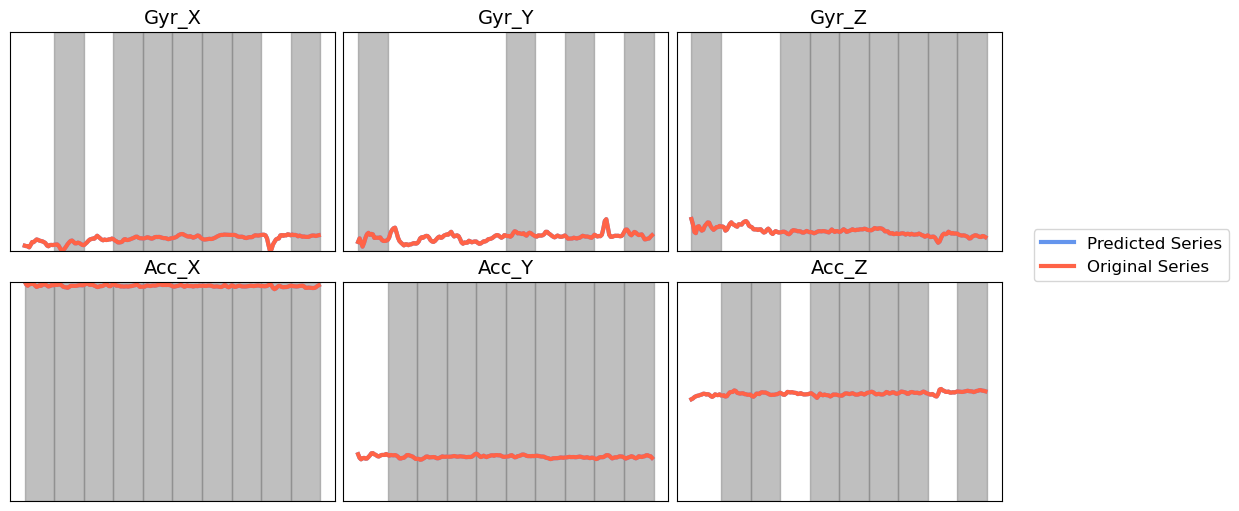

In [13]:
from engine_pretrain import plot_masked_series

fig = plot_masked_series(torch.from_numpy(mask),x,x)

In [14]:
from maxcut import max_cut_mask

In [22]:
x_p = model.patchify(x.unsqueeze(0).unsqueeze(0))
x_p.shape

torch.Size([1, 60, 20])

In [23]:
_, mask, _ = max_cut_mask(x_p)

/Users/leo/Desktop/MAE_Accelerometer/engine_pretrain.py:182: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(right=0.8)  # Make space for the legend


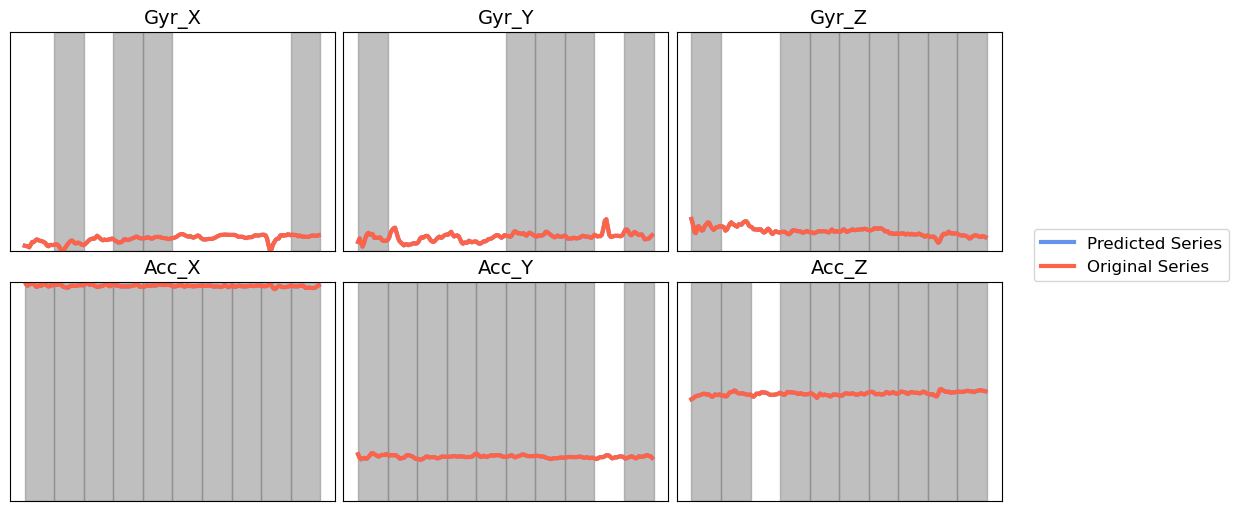

In [25]:
fig = plot_masked_series(mask.reshape(6,10),x,x)